In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

In [2]:
dataset=pd.read_csv("/home/vishal/jupyter/Concrete_Data.csv")

In [3]:
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
#simplifying column names since they are too lengthy
req_col_names=['Cement','BlastFurnaceSlag','FlyAsh','Water','Superplasticizer','CoarseAggregate','FineAggregate','Age','CC_Strength']
curr_col_names=list(dataset.columns)
mapper={}
for i,name in enumerate(curr_col_names):
    mapper[name]=req_col_names[i]
dataset=dataset.rename(columns=mapper)

In [5]:
dataset.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
dataset.shape

(1030, 9)

In [7]:
#check for null values
dataset.isnull().any().any()

False

In [8]:
dataset.isnull().sum() #no null values present

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

In [9]:
#performing exploratory data analysis
dataset.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


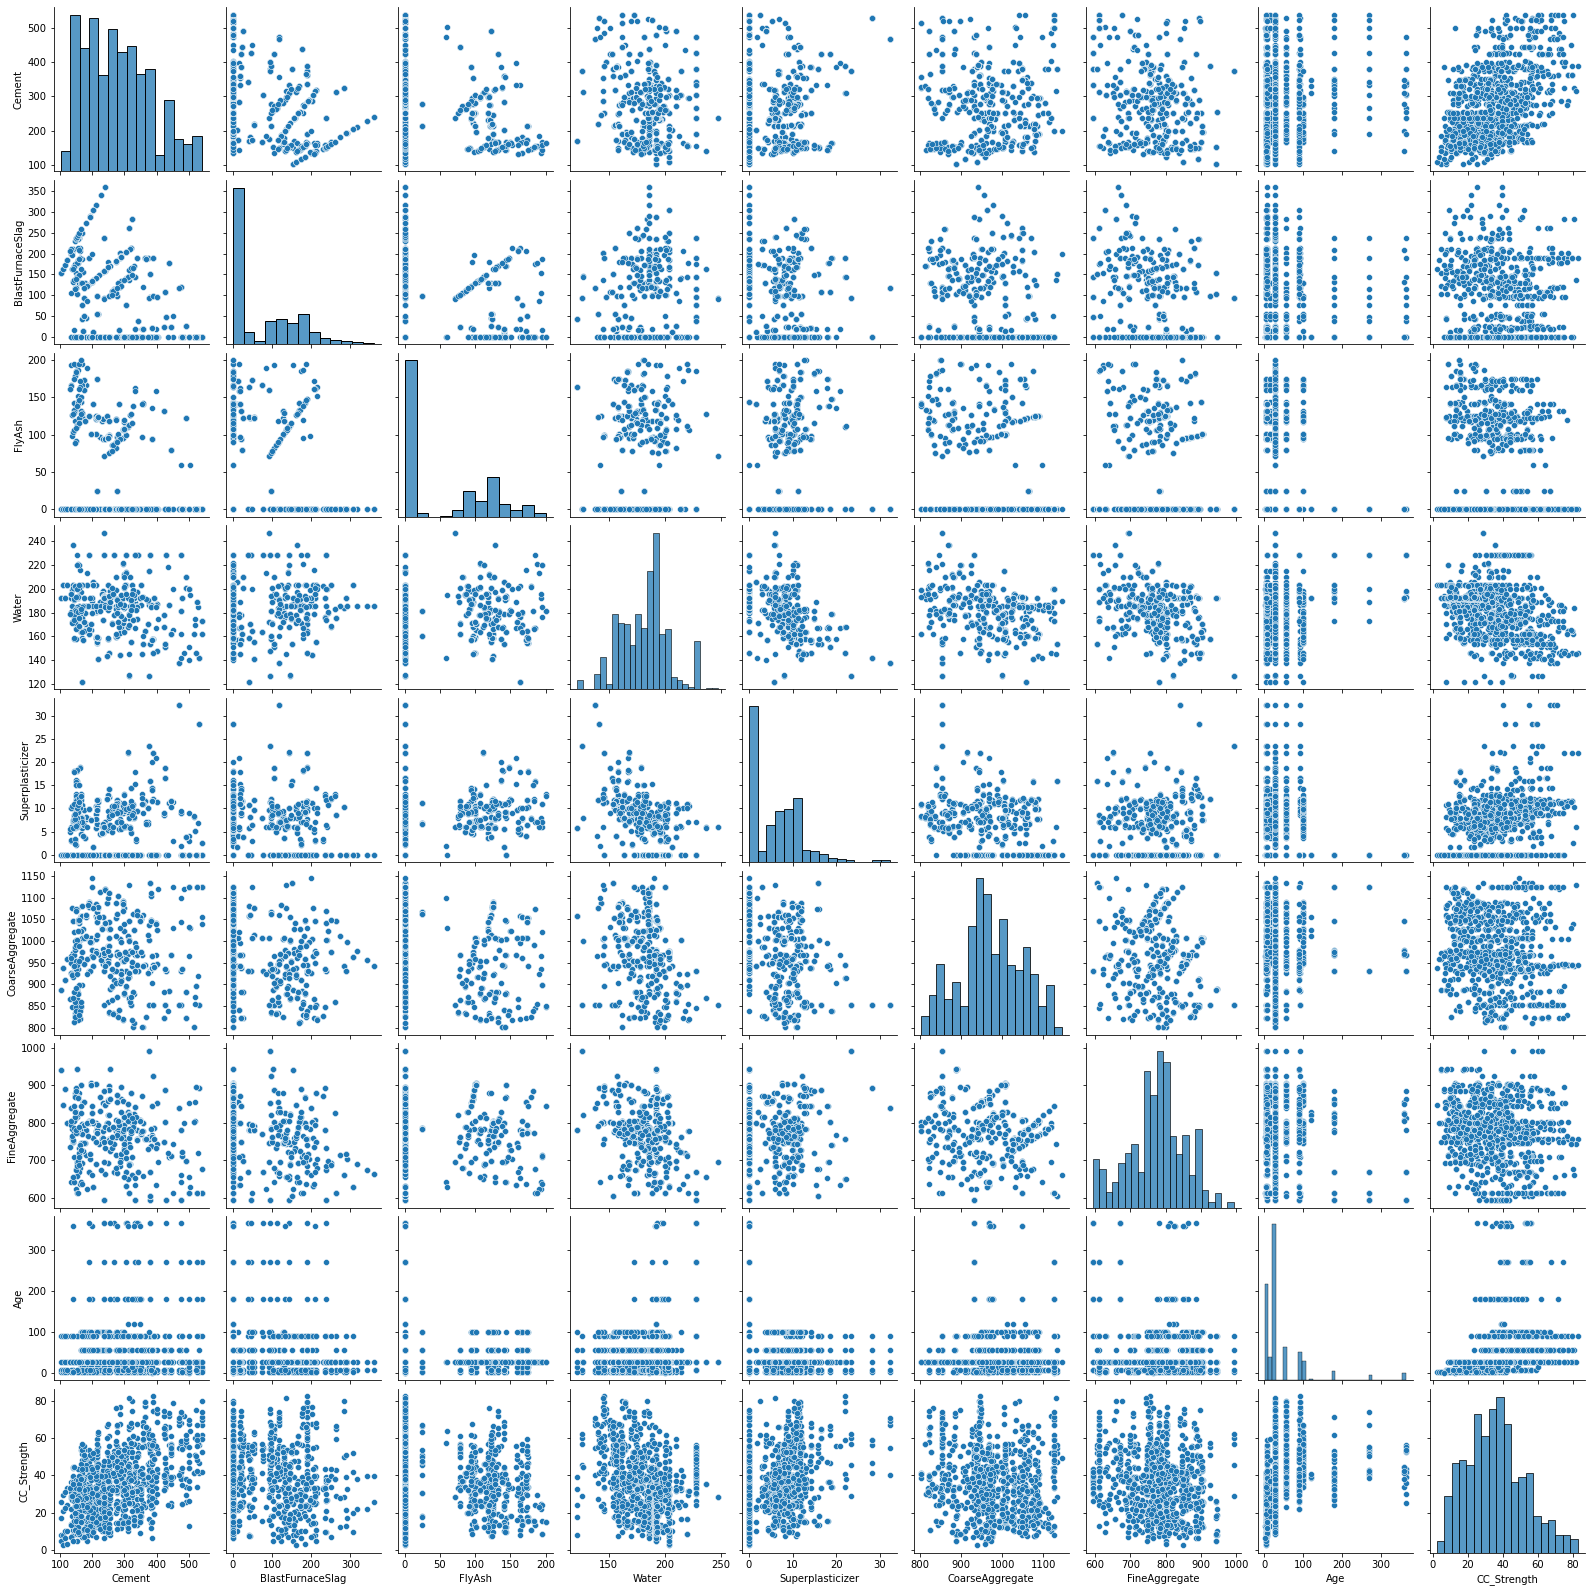

In [10]:
#performing multivariate analysis
sns.pairplot(dataset) #no correlation between independent variables

In [11]:
plt.show()

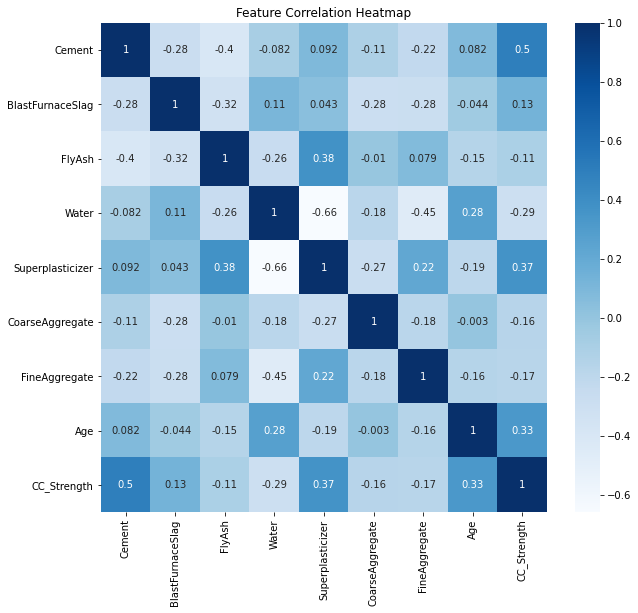

In [12]:
corr=dataset.corr()
plt.figure(figsize=(10,9))
sns.heatmap(corr,annot=True,cmap='Blues')
b,t=plt.ylim()
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:
#There arent any high correlations between Compressive Strength and other features except for cement,which should be the case for more strength.
#Age and Super plasticizer are the other two features which are moderately correlated with compressive strength.
#Super plasticcizer has a negative correlation with water,positive correlations with fly ash and fine aggregate.

/home/vishal/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Compressive Strength Distribution')

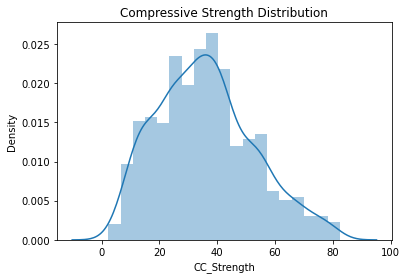

In [14]:
#further analyzing these correlations visually by plotting these relations
ax=sns.distplot(dataset['CC_Strength'])
ax.set_title('Compressive Strength Distribution')

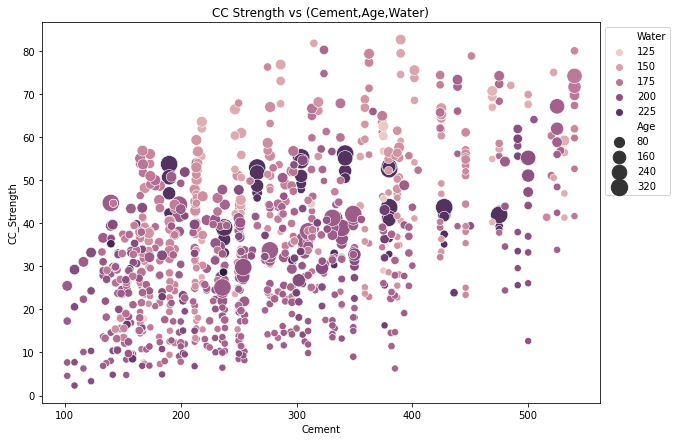

In [15]:
fig,ax=plt.subplots(figsize=(10,7))
sns.scatterplot(y='CC_Strength',x='Cement',hue='Water',size='Age',data=dataset,ax=ax,sizes=(50,300))
ax.set_title('CC Strength vs (Cement,Age,Water)')
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

In [16]:
#from above we can observe that
#1.compressive strength increases with amount of cement
#2.compressive strength increases with age
#3.cement with low age requires more cement
#4.older cement require more water
#5.concrete strength increases when less water is used in preparing it

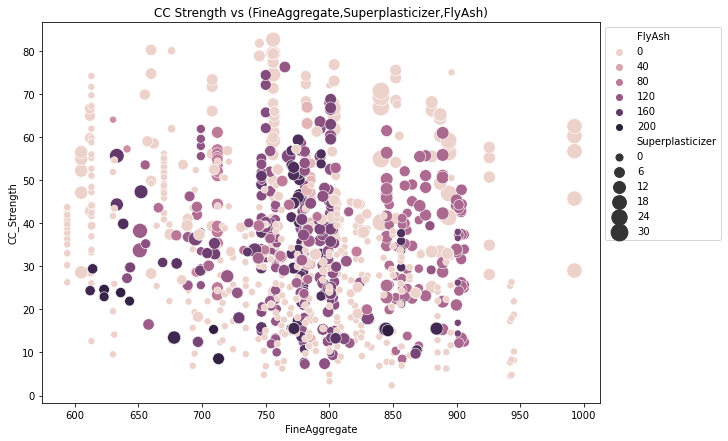

In [17]:
fig,ax=plt.subplots(figsize=(10,7))
sns.scatterplot(y='CC_Strength',x='FineAggregate',hue='FlyAsh',size='Superplasticizer',data=dataset,ax=ax,sizes=(50,300))
ax.set_title('CC Strength vs (FineAggregate,Superplasticizer,FlyAsh)')
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

In [18]:
#from above we can observe that
#1.strength decreases with increase in flyash
#2.strength increases with super plasticizer

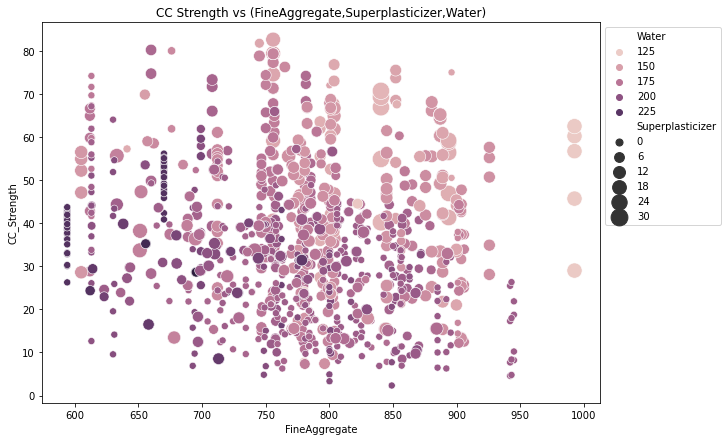

In [19]:
fig,ax=plt.subplots(figsize=(10,7))
sns.scatterplot(y='CC_Strength',x='FineAggregate',hue='Water',size='Superplasticizer',data=dataset,ax=ax,sizes=(50,300))
ax.set_title('CC Strength vs (FineAggregate,Superplasticizer,Water)')
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.show()

In [20]:
#from above we can observe that
#1.strength decreases with increase in water
#2.strength increases with increase in super plasticizer
#3.more fine aggregate is used when less water and more super plasticizer is used


In [21]:
#now we need to separate independent and dependent variables
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [22]:
#splitting data into training and test splits
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
#standardizing the data(rescaling the features to have a mean of zero and standard deviation of 1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [24]:
#model building
#objective function used in this case is mean Squared Error
#three versions of linear regression are used and compared
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()

In [25]:
lr.fit(x_train,y_train)
#fitting the linear regression model

LinearRegression()

In [26]:
lasso.fit(x_train,y_train)
#fitting lasso regression model

Lasso()

In [27]:
ridge.fit(x_train,y_train)
#fitting ridge regression model

Ridge()

In [28]:
#making predictions
y_pred_lr=lr.predict(x_test)
#predicting the test with linear regression model

In [29]:
y_pred_lasso=lasso.predict(x_test)
#predicting the test with lasso regression model

In [30]:
y_pred_ridge=ridge.predict(x_test)
#predicting the test with ridge regression model

In [31]:
#evaluation
#comparing RMSE,MSE,MAE,R2 score

In [32]:
#for linear regression
print('Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2')
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
           np.sqrt(mean_squared_error(y_test,y_pred_lr)),mean_squared_error(y_test,y_pred_lr),
           mean_absolute_error(y_test,y_pred_lr), r2_score(y_test,y_pred_lr)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.28 		 105.76 	8.23 		0.57


In [33]:
#for lasso regression
print('Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2')
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
           np.sqrt(mean_squared_error(y_test,y_pred_lasso)),mean_squared_error(y_test,y_pred_lasso),
           mean_absolute_error(y_test,y_pred_lasso), r2_score(y_test,y_pred_lasso)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.68 		 114.11 	8.65 		0.54


In [34]:
#for ridge regression
print('Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2')
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
           np.sqrt(mean_squared_error(y_test,y_pred_ridge)),mean_squared_error(y_test,y_pred_ridge),
           mean_absolute_error(y_test,y_pred_ridge), r2_score(y_test,y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.29 		 105.84 	8.24 		0.57


In [35]:
print('Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2')

print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
           np.sqrt(mean_squared_error(y_test,y_pred_lr)),mean_squared_error(y_test,y_pred_lr),
           mean_absolute_error(y_test,y_pred_lr), r2_score(y_test,y_pred_lr)))

print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
           np.sqrt(mean_squared_error(y_test,y_pred_lasso)),mean_squared_error(y_test,y_pred_lasso),
           mean_absolute_error(y_test,y_pred_lasso), r2_score(y_test,y_pred_lasso)))

print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
           np.sqrt(mean_squared_error(y_test,y_pred_ridge)),mean_squared_error(y_test,y_pred_ridge),
           mean_absolute_error(y_test,y_pred_ridge), r2_score(y_test,y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.28 		 105.76 	8.23 		0.57
LinearRegression 	 10.68 		 114.11 	8.65 		0.54
LinearRegression 	 10.29 		 105.84 	8.24 		0.57


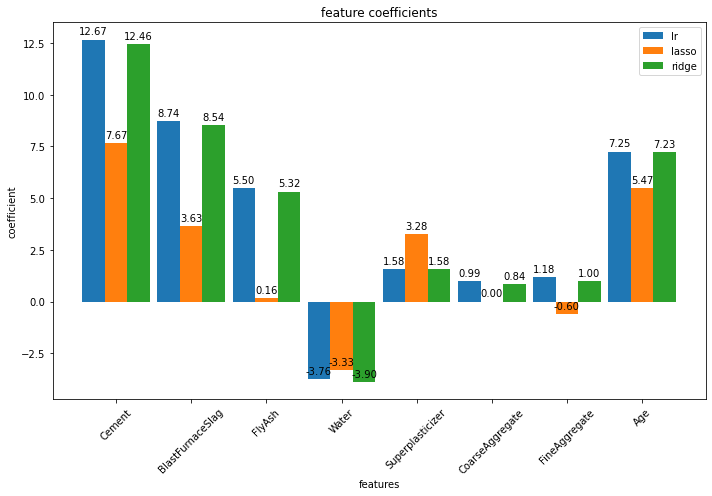

In [36]:
#plotting the coefficients

coeff_lr=lr.coef_
#linear regression coefficients
coeff_lasso=lasso.coef_
#lasso regression coefficients
coeff_ridge=ridge.coef_
#ridge regression coefficients

labels=req_col_names[:-1]

x=np.arange(len(labels))
width=0.3

fig,ax=plt.subplots(figsize=(10,7))
rects1=ax.bar(x-2*(width/2),coeff_lr,width,label='lr')
rects2=ax.bar(x,coeff_lasso,width,label='lasso')
rects3=ax.bar(x+2*(width/2),coeff_ridge,width,label='ridge')

ax.set_ylabel('coefficient')
ax.set_xlabel('features')
ax.set_title('feature coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*,displaying its height."""
    for rect in rects:
        height=rect.get_height()
        ax.annotate('{:.2f}'.format(height),xy=(rect.get_x()+rect.get_width()/2,height),
                     xytext=(0,3),textcoords='offset points',ha='center',va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

In [37]:
#as seen from above lasso regression reduces the complexity of the model by keeping the coefficients as low as possible
#coefficients with linear and ridge are almost same

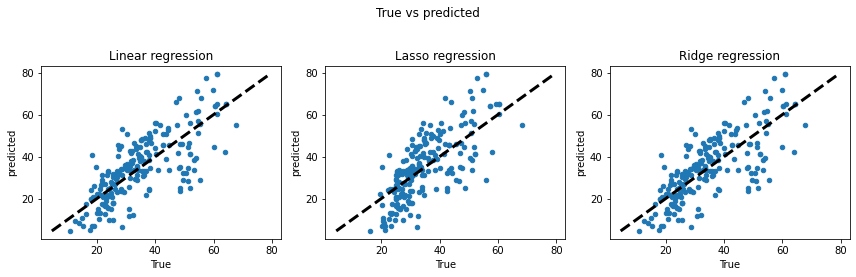

In [38]:
#plotting predictions
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,4))

ax1.scatter(y_pred_lr,y_test,s=20)
ax1.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=3)
ax1.set_xlabel('True')
ax1.set_ylabel('predicted')
ax1.set_title('Linear regression')

ax2.scatter(y_pred_lasso,y_test,s=20)
ax2.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=3)
ax2.set_xlabel('True')
ax2.set_ylabel('predicted')
ax2.set_title('Lasso regression')

ax3.scatter(y_pred_ridge,y_test,s=20)
ax3.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=3)
ax3.set_xlabel('True')
ax3.set_ylabel('predicted')
ax3.set_title('Ridge regression')

fig.suptitle('True vs predicted')

fig.tight_layout(rect=[0,0.03,1,0.95])

In [39]:
#looking at the graphs between predicted and true values of the target variable,we can conclude that linear and ridge regression perform well as the predictions are closer to the actual values.
#lasso regression reduces compexity at the cost of losing performance in this case(the closer the points are to the black line the less the error is)

In [40]:
#We use the decision tree algorithm where each node represents a decision taken on a feature.

Model				 RMSE 		 R2
Decision Tree Regressor 	 6.45 		0.83


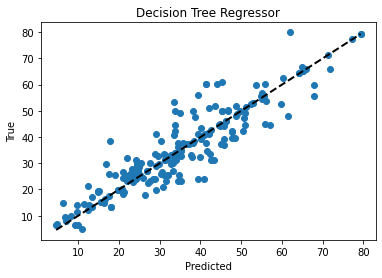

In [41]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(x_train, y_train) 
y_pred_dtr = dtr.predict(x_test)
print("Model\t\t\t\t RMSE \t\t R2") 
print("""Decision Tree Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_dtr)), r2_score(y_test, y_pred_dtr))) 
plt.scatter(y_test, y_pred_dtr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Decision Tree Regressor")
plt.show()

In [42]:
#RMSE has come down from 10.28 to 7.56 which is a significant improvement.
#we now use the random forest regression

Model				 RMSE 		 R2
Random Forest Regressor 	 5.11 		0.89


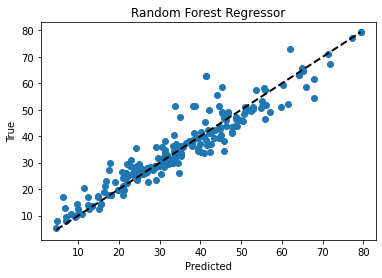

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100) 
rfr.fit(x_train, y_train) 
joblib.dump(rfr,'random.save')
y_pred_rfr = rfr.predict(x_test) 
print("Model\t\t\t\t RMSE \t\t R2") 
print("""Random Forest Regressor \t {:.2f} \t\t{:.2f}""".format( np.sqrt(mean_squared_error(y_test, y_pred_rfr)), r2_score(y_test, y_pred_rfr)))
plt.scatter(y_test, y_pred_rfr) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Random Forest Regressor") 
plt.show()

In [44]:
#RMSE has further reduced to 5.06
#We can plot the feature importance’s for tree-based models

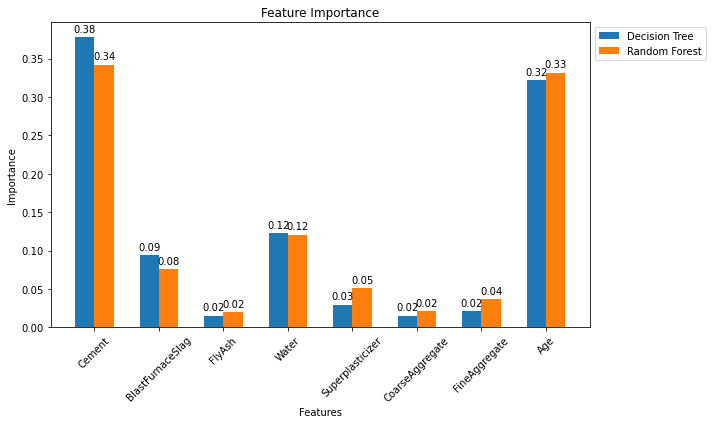

In [45]:
feature_dtr = dtr.feature_importances_ 
feature_rfr = rfr.feature_importances_
labels = req_col_names[:-1] 
x = np.arange(len(labels)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,6)) 
rects1 = ax.bar(x-(width/2), feature_dtr, width, label='Decision Tree') 
rects2 = ax.bar(x+(width/2), feature_rfr, width, label='Random Forest') 
ax.set_ylabel('Importance') 
ax.set_xlabel('Features') 
ax.set_title('Feature Importance') 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45) 
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) 
autolabel(rects1) 
autolabel(rects2) 
fig.tight_layout() 
plt.show()

In [46]:
#Cement and Age are treated as the most important features by tree-based models
#Fly ash, Coarse and Fine aggregates are the least important factors when predicting the Strength of Concrete

In [47]:
#comparing the results of all the algorithms

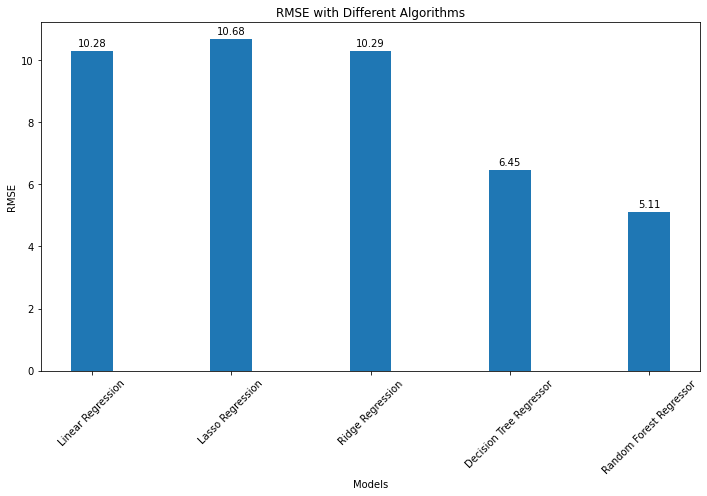

In [48]:
models = [lr, lasso, ridge, dtr, rfr] 
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree Regressor", "Random Forest Regressor"]
rmses = [] 
for model in models: 
   rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(x_test)))) 
x = np.arange(len(names)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(10,7)) 
rects = ax.bar(x, rmses, width) 
ax.set_ylabel('RMSE') 
ax.set_xlabel('Models') 
ax.set_title('RMSE with Different Algorithms') 
ax.set_xticks(x) 
ax.set_xticklabels(names, rotation=45) 
autolabel(rects) 
fig.tight_layout() 
plt.show()